# Module 21 - Mean Field Theory for the Ising Model

<img src='https://upload.wikimedia.org/wikipedia/commons/e/e6/Ising_quench_b10.gif', width=600px>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#plt.style.use('notebook');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

### We want to solve

\begin{equation}
M = \tanh \left(\frac{M n J}{k_BT}\right)
\end{equation}

Let's begin by looking for a graphical solution.  Define $x = nJ/k_BT$: at fixed $J$, $x\gg 1$ corresponds to low temperature while $x\ll 1$ is high temperature.

In [2]:
M = np.linspace(-1.5,1.5,1000)

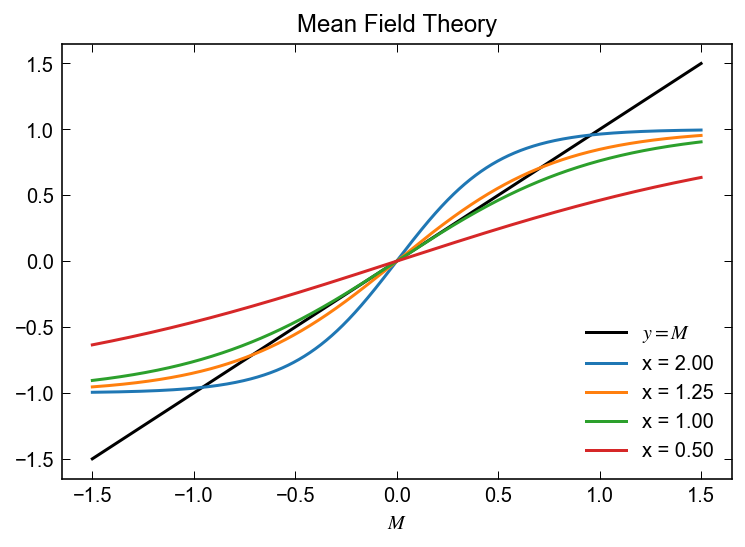

In [3]:
plt.figure()
plt.plot(M,M,color='k', label='$y=M$')
for cx in [2,1.25,1.0,0.5]:
    plt.plot(M,np.tanh(M*cx), label='x = %3.2f' % cx)
plt.xlabel(r'$M$')
plt.legend(loc='lower right')
plt.title('Mean Field Theory')

## Constructing the solution as a function of temperature

It appears that there is always a solution between 0 and 1 for any value of $x$.

In [4]:
def mean_field_eqn(m,cx):
    '''The mean field equation for the magnetization.'''
    return m - np.tanh(m*cx)

In [5]:
from scipy.optimize import fsolve
x = np.linspace(0.5,100,10000)
Mx = [fsolve(mean_field_eqn, 1.1, args=(cx)) for cx in x]

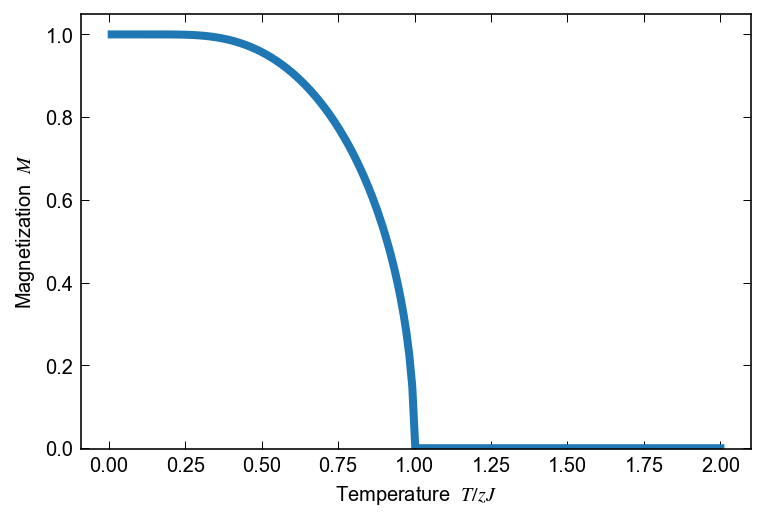

In [6]:
plt.figure()
plt.plot(1.0/x,Mx, linewidth=4)
plt.xlabel('Temperature  $T/zJ$')
plt.ylabel('Magnetization  $M$')
plt.ylim(-0.001,1.05);